# Exam Project: The formation of ISIS' Social Media Network
Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid
# Sentiment Analysis and Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

from our_functions import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # makes the bar charts red on grey background with grid, I think it is nice
default_red = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
%run ./cleaning_18052019.ipynb

ERROR:root:File `'./cleaning_18052019.ipynb.py'` not found.


In [3]:
from textblob import TextBlob
def get_polarity(s):
     return TextBlob(s).sentiment.polarity
    
def get_subjectivity(s):
    return TextBlob(s).sentiment.subjectivity

# Unedited tweets  --- results are the same when using preprocessed tweets.
df['polarity'] = df['tweets_unedit'].apply(get_polarity)
df['subjectivity'] = df['tweets_unedit'].apply(get_subjectivity)

NameError: name 'df' is not defined

In [ ]:
sub = df[['polarity','subjectivity','date']].groupby(['date']).mean().reset_index()
sub.set_index('date', inplace = True)

In [ ]:
fig = plot_periods(sub['polarity'],sub['subjectivity'])
fig.legend(labels=["Polarity", "Subjectivity"], loc = "upper right", title="Legend")
plt.savefig('figures_exam_project/polarity_subjectivity_timestamp.png')


In [ ]:
# Sentiments by top 10 users
# Define Top 10 users
top10_users = df[df.username.isin(df.username.value_counts()[:10].keys().tolist())]

# Make graph
pd.crosstab(top10_users.username, top10_users.polarity).plot.bar(stacked=True, figsize=(16, 10), colormap="coolwarm")
plt.legend().set_visible(False)
plt.title("Polarity of Top 10 Users")
plt.savefig('figures_exam_project/polarity_top10.png')

# Text classification

In [7]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

def our_tokenizer(text):
    return text

vec = TfidfVectorizer(tokenizer=our_tokenizer, ngram_range=(1,2), max_df=.5, lowercase=False)
X = vec.fit_transform(df.tokens.tolist())

terms = vec.get_feature_names()

nmf = NMF(n_components=10).fit(X)
for idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % idx)
    print(" ".join([terms[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print("")

Topic #0:
kill soldier soldier kill militant claim kill soldier clash injure attack iraqi soldier

Topic #1:
state islamic islamic state fighter state fighter force state force capture fighting via

Topic #2:
isis us assad rebel syrian attack say fight syria muslim

Topic #3:
lol like lol look look know yeah lol yeah lol guess lol seriously lol dying

Topic #4:
army near destroy tank attack target report iraqi position force

Topic #5:
al abu qaeda al qaeda nusra al nusra jabhat sham jabhat al islam

Topic #6:
city work east east city center photo city night center city western west city

Topic #7:
allah may may allah one accept brother allah accept protect allah protect muslim

Topic #8:
ameen inshaallah ameen inshaallah ameen allahuma allahuma ameen allahuma ameen u u also may shaheed

Topic #9:
today airstrikes civilian kill child civilian kill kill today one coalition wounded



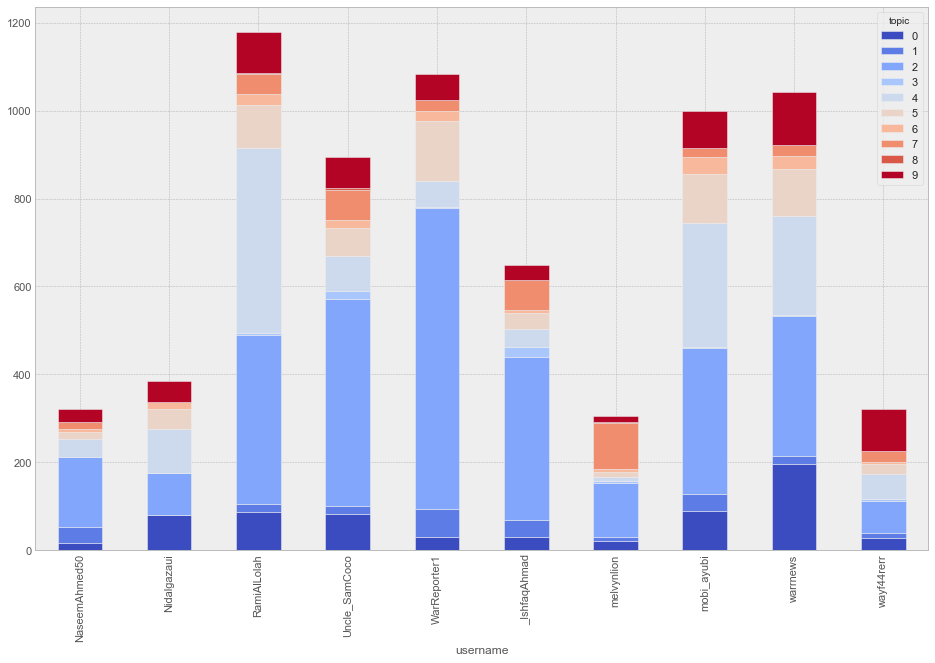

In [8]:
style.use('bmh')

df['topic'] = np.argmax(nmf.transform(vec.transform(df.tokens.tolist())), axis=1)
top10_users = df[df.username.isin(df.username.value_counts()[:10].keys().tolist())]
pd.crosstab(top10_users.username, top10_users.topic).plot.bar(stacked=True, figsize=(16, 10), colormap="coolwarm")

# LDA

In [27]:
# Build the bigram and trigram models
import gensim
data_words = df.tokens.tolist()
bigram = gensim.models.phrases.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.phrases.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(bigram_mod[data_words[0]])

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['sheikh', 'nasir', 'leader', 'aqap', 'promise', 'victory']


In [28]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

In [29]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [45]:
# Build LDA model
# Note: here I take 20 topics, it says that generally we should play around with different number of topics and see which has the best fit
# Please note: this takes long
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [46]:
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.074*"kill" + 0.030*"iraqi" + 0.022*"today" + 0.018*"capture" + '
  '0.018*"allah" + 0.016*"take" + 0.015*"say" + 0.014*"claim" + '
  '0.014*"militant" + 0.012*"pig"'),
 (1,
  '0.032*"army" + 0.031*"soldier" + 0.030*"force" + 0.026*"near" + '
  '0.025*"city" + 0.021*"attack" + 0.016*"assad" + 0.015*"report" + '
  '0.015*"syrian" + 0.012*"tank"'),
 (2,
  '0.051*"isis" + 0.032*"fighter" + 0.031*"state" + 0.030*"islamic" + '
  '0.022*"north" + 0.017*"village" + 0.016*"airstrikes" + 0.015*"civilian" + '
  '0.015*"target" + 0.015*"martyrdom"'),
 (3,
  '0.031*"area" + 0.027*"destroy" + 0.022*"regime" + 0.019*"abu" + '
  '0.015*"muslim" + 0.014*"make" + 0.014*"like" + 0.012*"group" + '
  '0.011*"breaking" + 0.011*"release"')]


In [47]:
from gensim.models import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.199060980329904

Coherence Score:  0.23801566417084205


In [48]:
import pyLDAvis
import pyLDAvis.gensim 
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.397149 -0.022245       1        1  28.320044
0     -0.167527 -0.274879       2        1  27.276819
3     -0.107410 -0.060980       3        1  22.318411
2     -0.122212  0.358104       4        1  22.084724, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
143   Default  1881.000000        kill  1881.000000  30.0000  30.0000
247   Default  1051.000000        isis  1051.000000  29.0000  29.0000
125   Default   856.000000        army   856.000000  28.0000  28.0000
139   Default   809.000000     soldier   809.000000  27.0000  27.0000
100   Default   667.000000     fighter   667.000000  26.0000  26.0000
268   Default   764.000000       iraqi   764.000000  25.0000  25.0000
438   Default   784.000000       force   784.000000  24.0000  24.0000
196   Default   653.000000        area   653.000000  23.0000  23.0000
63    Default   633.000000       state   633.000000  22.0000  22.0000
48    Default   621.000000     islamic   621.000000  21.0000  21.0000
673   Default   698.000000        near   698.000000  20.0000  20.0000
246   Default   566.000000     destroy   566.000000  19.0000  19.0000
127   Default   656.000000        city   656.000000  18.0000  18.0000
152   Default   549.000000       today   549.000000  17.0000  17.0000
149   Default   559.000000      attack   559.000000  16.0000  16.0000
121   Default   458.000000       north   458.000000  15.0000  15.0000
274   Default   450.000000      regime   450.000000  14.0000  14.0000
227   Default   468.000000     capture   468.000000  13.0000  13.0000
345   Default   456.000000       allah   456.000000  12.0000  12.0000
73    Default   388.000000         abu   388.000000  11.0000  11.0000
240   Default   416.000000       assad   416.000000  10.0000  10.0000
111   Default   342.000000     village   342.000000   9.0000   9.0000
64    Default   399.000000        take   399.000000   8.0000   8.0000
275   Default   334.000000  airstrikes   334.000000   7.0000   7.0000
91    Default   386.000000         say   386.000000   6.0000   6.0000
37    Default   396.000000      report   396.000000   5.0000   5.0000
38    Default   389.000000      syrian   389.000000   4.0000   4.0000
103   Default   318.000000    civilian   318.000000   3.0000   3.0000
151   Default   369.000000       claim   369.000000   2.0000   2.0000
261   Default   313.000000      target   313.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
247    Topic4  1051.066528        isis  1051.860352   1.5095  -2.9786
100    Topic4   666.253601     fighter   667.049072   1.5091  -3.4345
63     Topic4   633.143616       state   633.924561   1.5091  -3.4855
48     Topic4   620.820801     islamic   621.603516   1.5090  -3.5051
121    Topic4   457.817474       north   458.630219   1.5085  -3.8097
111    Topic4   342.053833     village   342.841064   1.5080  -4.1012
275    Topic4   333.440857  airstrikes   334.233673   1.5079  -4.1267
103    Topic4   317.378540    civilian   318.174347   1.5078  -4.1761
261    Topic4   312.600769      target   313.423523   1.5077  -4.1912
107    Topic4   289.553741    military   290.349640   1.5075  -4.2678
410    Topic4   311.066742   martyrdom   311.921936   1.5075  -4.1962
324    Topic4   290.696716       syria   291.505859   1.5075  -4.2639
173    Topic4   280.726959       fight   281.525055   1.5074  -4.2988
230    Topic4   274.125946        east   274.934418   1.5073  -4.3226
502    Topic4   238.614319        bomb   239.404297   1.5070  -4.4613
99     Topic4   241.550369      battle   242.363678   1.5069  -4.4491
162    Topic4   224.581436    apostate   225.393860   1.5067  -4.5219
703    Topic4   211.723587     kurdish   212.538239   1.5064  -4.5809
672    Topic4   213.302948      shiite   214.178757   1.5062  -